# 03 Vanilla Policy Gradient with rewards to go as weights

#### 👉🏽 The policy network will have the following architecture:

<img src="https://github.com/Paulescu/hands-on-rl/blob/main/04_lunar_lander/images/policy_network.svg?raw=True" width="300"/>

#### 👉🏽 And we will use the rewards-to-go to compute the weights in the policy gradient formula.

In [51]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [52]:
!pip install pygame
!pip install gymnasium
!pip install gym
!pip install Box2D

In [53]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/CAS_AML_RL/hands_on/04_lunar_lander/notebooks/')  # Add the parent directory to the path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Environment 🚀🌙

In [54]:
import gym
env = gym.make('LunarLander-v2')
ENV_NAME = 'LunarLander-v2'

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


## Create agent and set hyperparameters

In [55]:
from src.vpg_agent import VPGAgent

agent = VPGAgent(
    env_name=ENV_NAME,
    learning_rate=3e-3,
    hidden_layers=[64],
    gradient_weights='rewards-to-go',
)

Policy network with 836 parameters
Sequential(
  (0): Linear(in_features=8, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=4, bias=True)
)


## Tensorboard logger to see training metrics

In [56]:
from src.utils import get_agent_id
agent_id = get_agent_id(ENV_NAME)
print(f'agent_id = {agent_id}')

# tensorboard logger to see training curves
from src.utils import get_logger, get_model_path
logger = get_logger(env_name=ENV_NAME, agent_id=agent_id)

# path to save policy network weights and hyperparameters
model_path = get_model_path(env_name=ENV_NAME, agent_id=agent_id)

agent_id = 7


## Training 🏋️

In [57]:
agent.train(
    n_policy_updates=100,
    batch_size=256,
    logger=logger,
    model_path=model_path,
)

/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


epoch:   0 	 loss: -180.962 	 reward: -174.563
epoch:   1 	 loss: -205.104 	 reward: -174.936
epoch:   2 	 loss: -226.465 	 reward: -175.246
epoch:   3 	 loss: -239.866 	 reward: -192.688
epoch:   4 	 loss: -263.143 	 reward: -272.919
epoch:   5 	 loss: -96.030 	 reward: -104.117
epoch:   6 	 loss: -299.065 	 reward: -249.002
epoch:   7 	 loss: -211.253 	 reward: -209.077
epoch:   8 	 loss: -247.034 	 reward: -217.842
epoch:   9 	 loss: -301.584 	 reward: -289.957


100%|██████████| 100/100 [00:06<00:00, 14.99it/s]


Best model! Average reward = -156.82, Success rate = 0.00%
epoch:  10 	 loss: -118.986 	 reward: -114.812
epoch:  11 	 loss: -226.660 	 reward: -172.309
epoch:  12 	 loss: -172.371 	 reward: -154.361
epoch:  13 	 loss: -96.751 	 reward: -86.981
epoch:  14 	 loss: -120.748 	 reward: -108.748
epoch:  15 	 loss: -177.765 	 reward: -172.531
epoch:  16 	 loss: -155.596 	 reward: -149.097
epoch:  17 	 loss: -259.511 	 reward: -221.640
epoch:  18 	 loss: -85.722 	 reward: -93.948
epoch:  19 	 loss: -244.992 	 reward: -212.968


100%|██████████| 100/100 [00:05<00:00, 18.82it/s]


epoch:  20 	 loss: -258.088 	 reward: -231.495
epoch:  21 	 loss: -116.352 	 reward: -105.017
epoch:  22 	 loss: -150.914 	 reward: -149.077
epoch:  23 	 loss: -274.744 	 reward: -271.424
epoch:  24 	 loss: -279.858 	 reward: -272.776
epoch:  25 	 loss: -175.905 	 reward: -155.415
epoch:  26 	 loss: -123.238 	 reward: -115.880
epoch:  27 	 loss: -95.421 	 reward: -95.304
epoch:  28 	 loss: -267.013 	 reward: -216.747
epoch:  29 	 loss: -194.654 	 reward: -190.903


100%|██████████| 100/100 [00:06<00:00, 14.79it/s]


epoch:  30 	 loss: -145.179 	 reward: -125.453
epoch:  31 	 loss: -208.169 	 reward: -196.806
epoch:  32 	 loss: -106.493 	 reward: -99.109
epoch:  33 	 loss: -176.600 	 reward: -167.102
epoch:  34 	 loss: -78.795 	 reward: -85.953
epoch:  35 	 loss: -183.306 	 reward: -183.340
epoch:  36 	 loss: -251.750 	 reward: -213.946
epoch:  37 	 loss: -166.980 	 reward: -153.344
epoch:  38 	 loss: -255.724 	 reward: -239.285
epoch:  39 	 loss: -170.440 	 reward: -174.220


100%|██████████| 100/100 [00:05<00:00, 18.01it/s]


epoch:  40 	 loss: -256.790 	 reward: -240.593
epoch:  41 	 loss: -189.791 	 reward: -156.076
epoch:  42 	 loss: -181.607 	 reward: -155.816
epoch:  43 	 loss: -211.328 	 reward: -202.895
epoch:  44 	 loss: -172.849 	 reward: -153.564
epoch:  45 	 loss: -231.532 	 reward: -219.593
epoch:  46 	 loss: -208.607 	 reward: -188.515
epoch:  47 	 loss: -200.117 	 reward: -185.269
epoch:  48 	 loss: -275.848 	 reward: -257.688
epoch:  49 	 loss: -183.347 	 reward: -176.387


100%|██████████| 100/100 [00:06<00:00, 16.40it/s]


epoch:  50 	 loss: -137.320 	 reward: -131.314
epoch:  51 	 loss: -205.710 	 reward: -180.549
epoch:  52 	 loss: -144.478 	 reward: -132.626
epoch:  53 	 loss: -191.354 	 reward: -168.568
epoch:  54 	 loss: -128.957 	 reward: -115.980
epoch:  55 	 loss: -234.483 	 reward: -223.449
epoch:  56 	 loss: -138.298 	 reward: -118.638
epoch:  57 	 loss: -181.207 	 reward: -152.811
epoch:  58 	 loss: -140.293 	 reward: -159.132
epoch:  59 	 loss: -200.871 	 reward: -189.468


100%|██████████| 100/100 [00:06<00:00, 15.29it/s]


Best model! Average reward = -142.86, Success rate = 1.00%
epoch:  60 	 loss: -132.274 	 reward: -131.493
epoch:  61 	 loss: -137.127 	 reward: -124.427
epoch:  62 	 loss: -122.223 	 reward: -112.584
epoch:  63 	 loss: -187.183 	 reward: -178.812
epoch:  64 	 loss: -191.247 	 reward: -186.125
epoch:  65 	 loss: -112.216 	 reward: -96.068
epoch:  66 	 loss: -226.967 	 reward: -198.922
epoch:  67 	 loss: -176.568 	 reward: -168.302
epoch:  68 	 loss: -191.839 	 reward: -190.340
epoch:  69 	 loss: -137.101 	 reward: -122.234


100%|██████████| 100/100 [00:05<00:00, 19.21it/s]


Best model! Average reward = -129.88, Success rate = 0.00%
epoch:  70 	 loss: -133.952 	 reward: -123.032
epoch:  71 	 loss: -246.076 	 reward: -191.483
epoch:  72 	 loss: -106.206 	 reward: -94.397
epoch:  73 	 loss: -122.021 	 reward: -110.766
epoch:  74 	 loss: -162.354 	 reward: -151.082
epoch:  75 	 loss: -128.493 	 reward: -127.762
epoch:  76 	 loss: -178.786 	 reward: -175.069
epoch:  77 	 loss: -158.116 	 reward: -166.472
epoch:  78 	 loss: -91.938 	 reward: -107.241
epoch:  79 	 loss: -211.937 	 reward: -191.604


100%|██████████| 100/100 [00:06<00:00, 16.58it/s]


epoch:  80 	 loss: -226.471 	 reward: -212.720
epoch:  81 	 loss: -101.778 	 reward: -109.064
epoch:  82 	 loss: -214.150 	 reward: -178.491
epoch:  83 	 loss: -119.750 	 reward: -114.003
epoch:  84 	 loss: -132.640 	 reward: -119.684
epoch:  85 	 loss: -189.487 	 reward: -175.090
epoch:  86 	 loss: -139.231 	 reward: -131.014
epoch:  87 	 loss: -136.239 	 reward: -137.490
epoch:  88 	 loss: -114.671 	 reward: -122.836
epoch:  89 	 loss: -191.297 	 reward: -158.789


100%|██████████| 100/100 [00:05<00:00, 19.61it/s]


epoch:  90 	 loss: -142.418 	 reward: -128.405
epoch:  91 	 loss: -147.156 	 reward: -132.828
epoch:  92 	 loss: -175.440 	 reward: -150.020
epoch:  93 	 loss: -137.017 	 reward: -139.082
epoch:  94 	 loss: -81.126 	 reward: -81.420
epoch:  95 	 loss: -155.610 	 reward: -141.703
epoch:  96 	 loss: -205.260 	 reward: -145.890
epoch:  97 	 loss: -127.340 	 reward: -113.674
epoch:  98 	 loss: -124.792 	 reward: -117.319
epoch:  99 	 loss: -204.835 	 reward: -181.649


100%|██████████| 100/100 [00:06<00:00, 15.75it/s]


## Evaluate the agent ⏱️

In [58]:
rewards, success = agent.evaluate(n_episodes=100)

100%|██████████| 100/100 [00:05<00:00, 19.18it/s]


### Average reward

In [59]:
import numpy as np
reward_avg = np.array(rewards).mean()
reward_std = np.array(rewards).std()
print(f'Reward average {reward_avg:.2f}, std {reward_std:.2f}')

success_rate = np.array(success).mean()
print(f'Succes rate = {success_rate:.2%}')

Reward average -152.50, std 97.65
Succes rate = 0.00%


## Reward distribution

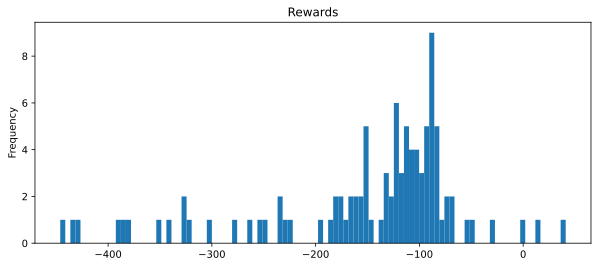

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize = (10, 4))
ax.set_title("Rewards")
pd.Series(rewards).plot(kind='hist', bins=100)

plt.show()

## Let's see our agent in action 🎬

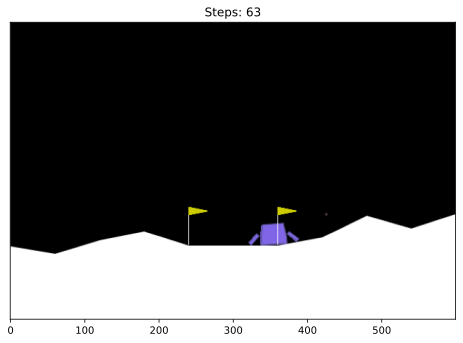

In [61]:
# Workaround for pygame error: "error: No available video device"
# See https://stackoverflow.com/questions/15933493/pygame-error-no-available-video-device?rq=1
# This is probably needed only for Linux
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
from src.viz import show_video

show_video(agent, env, sleep_sec=0.01, seed=12345)